Accuracy:  0.5112
[1. 1. 1. ... 0. 0. 1.]


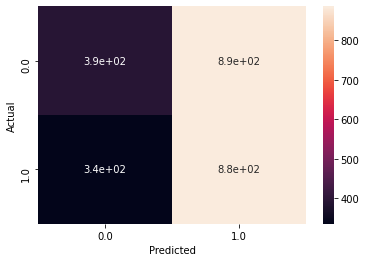

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report, confusion_matrix

# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure

#Lendo os dados 
dfPoints = pd.read_csv("./Downloads/Emprego/df_points.txt", delimiter="\t")


X = dfPoints[['x', 'y','z']]
y = dfPoints['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)



confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(y_pred)
plt.show()

In [38]:
import statsmodels.api as sm

#Criando o modelo
model = sm.Logit(y_train, X_train)

result = model.fit(method='newton')



Optimization terminated successfully.
         Current function value: 0.692818
         Iterations 3


In [39]:
result.predict(X_test)

9394    0.497818
898     0.494678
2398    0.508447
5906    0.476814
2343    0.481942
          ...   
8764    0.483873
4359    0.494526
2041    0.487045
1108    0.488390
3332    0.522757
Length: 2500, dtype: float64

In [40]:
par = result.params
par


x    0.000028
y    0.000114
z   -0.000135
dtype: float64

In [26]:
result.predict(X_train)

2967    0.498559
700     0.510732
3481    0.492929
1621    0.496948
800     0.514220
          ...   
9225    0.510989
4859    0.514933
3264    0.482085
9845    0.499948
2732    0.502253
Length: 7500, dtype: float64

In [30]:
(result.predict(X_train) >= 0.5).astype(int)


2967    0
700     1
3481    0
1621    0
800     1
       ..
9225    1
4859    1
3264    0
9845    0
2732    1
Length: 7500, dtype: int64

In [31]:
confm = result.pred_table()
confm

array([[2012., 1681.],
       [1728., 2079.]])

Text(0.5, 257.44, 'Predicted label')

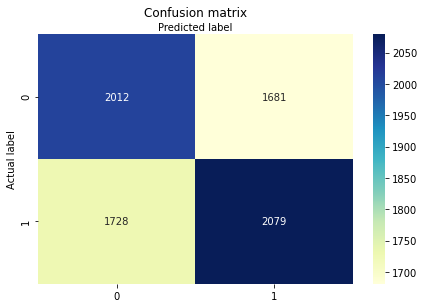

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(confm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
 result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 May 2020   Pseudo R-squ.:               0.0003079
Time:                        14:52:18   Log-Likelihood:                -5196.1
converged:                       True   LL-Null:                       -5197.7
Covariance Type:            nonrobust   LLR p-value:                    0.2018
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x           2.839e-05   8.03e-05      0.353      0.724      -0.000       0.000
y              0.0001   8.05e-05      1.410      0.159   -4.43e-05       0.000
z             -0.0001   7.97e-05     -1.691      0.091      -0.000    2.15e-05
==============================================================================
"""

In [36]:
dresult.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: label            AIC:              10398.2743
Date:               2020-05-04 14:52 BIC:              10419.0423
No. Observations:   7500             Log-Likelihood:   -5196.1   
Df Model:           2                LL-Null:          -5197.7   
Df Residuals:       7497             LLR p-value:      0.20184   
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     3.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x       0.0000      0.0001     0.3534    0.7238    -0.0001    0.0002
y       0.0001      0.0001     1.4097    0.1586    -0.0000    0.0003
z      -0.0001      0.0001    -1.6908    0.0909    -0.0003    0.0000
=================================================================

"""

In [82]:
# df = dfPoints.copy()
# df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
# df = df.sort_values(by='x')

from scipy.special import expit

sigmoid_function = expit(dfPoints['x','y','z'] * logistic_regression.coef_[0][0][1][1][2][2] + logistic_regression.intercept_[0][1][2]).ravel()
sigmoid_function
# plt.plot(dfPoints['x'], sigmoid_function)
# plt.scatter(dfPoints['x'], dfPoints['y'], c=dfPoints['y'], cmap='rainbow', edgecolors='b')

KeyError: ('x', 'y', 'z')

In [81]:
import plotly.express as px
fig = px.scatter_3d(dfPoints, x='x', y='y', z='z',
              color='label',hover_data=['label'])
fig.update_layout(scene_zaxis_type="log")
# fig = px.(dfPoints, x="x", y="y", z="z")
fig.show()

In [74]:
import plotly.graph_objects as go
import numpy as np
# np.random.seed(1)

# N = 70

fig = go.Figure(data=[(go.Scatter3d(x=(dfPoints['x']),y=(dfPoints['y']),
                   z=(dfPoints['z']),
                   opacity=0.2,
                   color='rgba(244,22,100,0.6)'
                                 ))])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-500,500],),
                     yaxis = dict(nticks=4, range=[-50,100],),
                     zaxis = dict(nticks=4, range=[-100,100],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter3d: 'color'

    Valid properties:
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        error_x
            :class:`plotly.graph_objects.scatter3d.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter3d.ErrorY` instance
            or dict with compatible properties
        error_z
            :class:`plotly.graph_objects.scatter3d.ErrorZ` instance
            or dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.scatter3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        line
            :class:`plotly.graph_objects.scatter3d.Line` instance
            or dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter3d.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        projection
            :class:`plotly.graph_objects.scatter3d.Projection`
            instance or dict with compatible properties
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.scatter3d.Stream` instance
            or dict with compatible properties
        surfaceaxis
            If "-1", the scatter points are not fill with a surface
            If 0, 1, 2, the scatter points are filled with a
            Delaunay surface about the x, y, z respectively.
        surfacecolor
            Sets the surface fill color.
        text
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. If trace `hoverinfo` contains a "text"
            flag and "hovertext" is not set, these elements will be
            seen in the hover labels.
        textfont
            :class:`plotly.graph_objects.scatter3d.Textfont`
            instance or dict with compatible properties
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            textposition .
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            texttemplate .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the y coordinates.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        z
            Sets the z coordinates.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zsrc
            Sets the source reference on Chart Studio Cloud for  z
            .
        

In [62]:
import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=[go.Surface(z=sigmoid_function)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()